## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos.

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia.

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex

Age	- Age in years

sibsp -	# of siblings / spouses aboard the Titanic

parch- # of parents / children aboard the Titanic

ticket - Ticket number

fare - Passenger fare

cabin- Cabin number

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('sisvan_estado_nutricional_202.000.csv')
display(data)

UnicodeDecodeError: ignored

In [ ]:
data2 = pd.read_csv('test.csv')
display(len(data2))

625134

In [ ]:
traindata = traindata.replace('female', 1)
traindata = traindata.replace('male', 2)
X_train, X_test, y_train, y_test= train_test_split(traindata[traindata.columns.difference(['Survived', 'Cabin','Name','Embarked','Ticket'])], traindata['Survived'], test_size=0.2, stratify=traindata['Survived'], random_state=42)
X_train.shape

NameError: ignored

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.770949720670391

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       110
           1       0.80      0.54      0.64        69

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.77      0.76       179



In [ ]:
testdata.fillna(method='ffill', inplace=True)
testdata = testdata.replace('female', 1)
testdata = testdata.replace('male', 2)
y_pred_test = dt.predict(testdata[testdata.columns.difference(['Name','Ticket','Cabin', 'Embarked'])])

In [ ]:
tam = len(testdata['PassengerId'].values.tolist())
newlist =[]
for x in range(tam):
  newlist.append([testdata['PassengerId'].values.tolist()[x],y_pred_test.tolist()[x]])

newlist

df = pd.DataFrame(np.array(newlist), columns=['PassengerId','Survived'])
display(df)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
csv_data = df.to_csv('result.csv', index = False)
print('\nCSV String:\n', csv_data)


CSV String:
 None


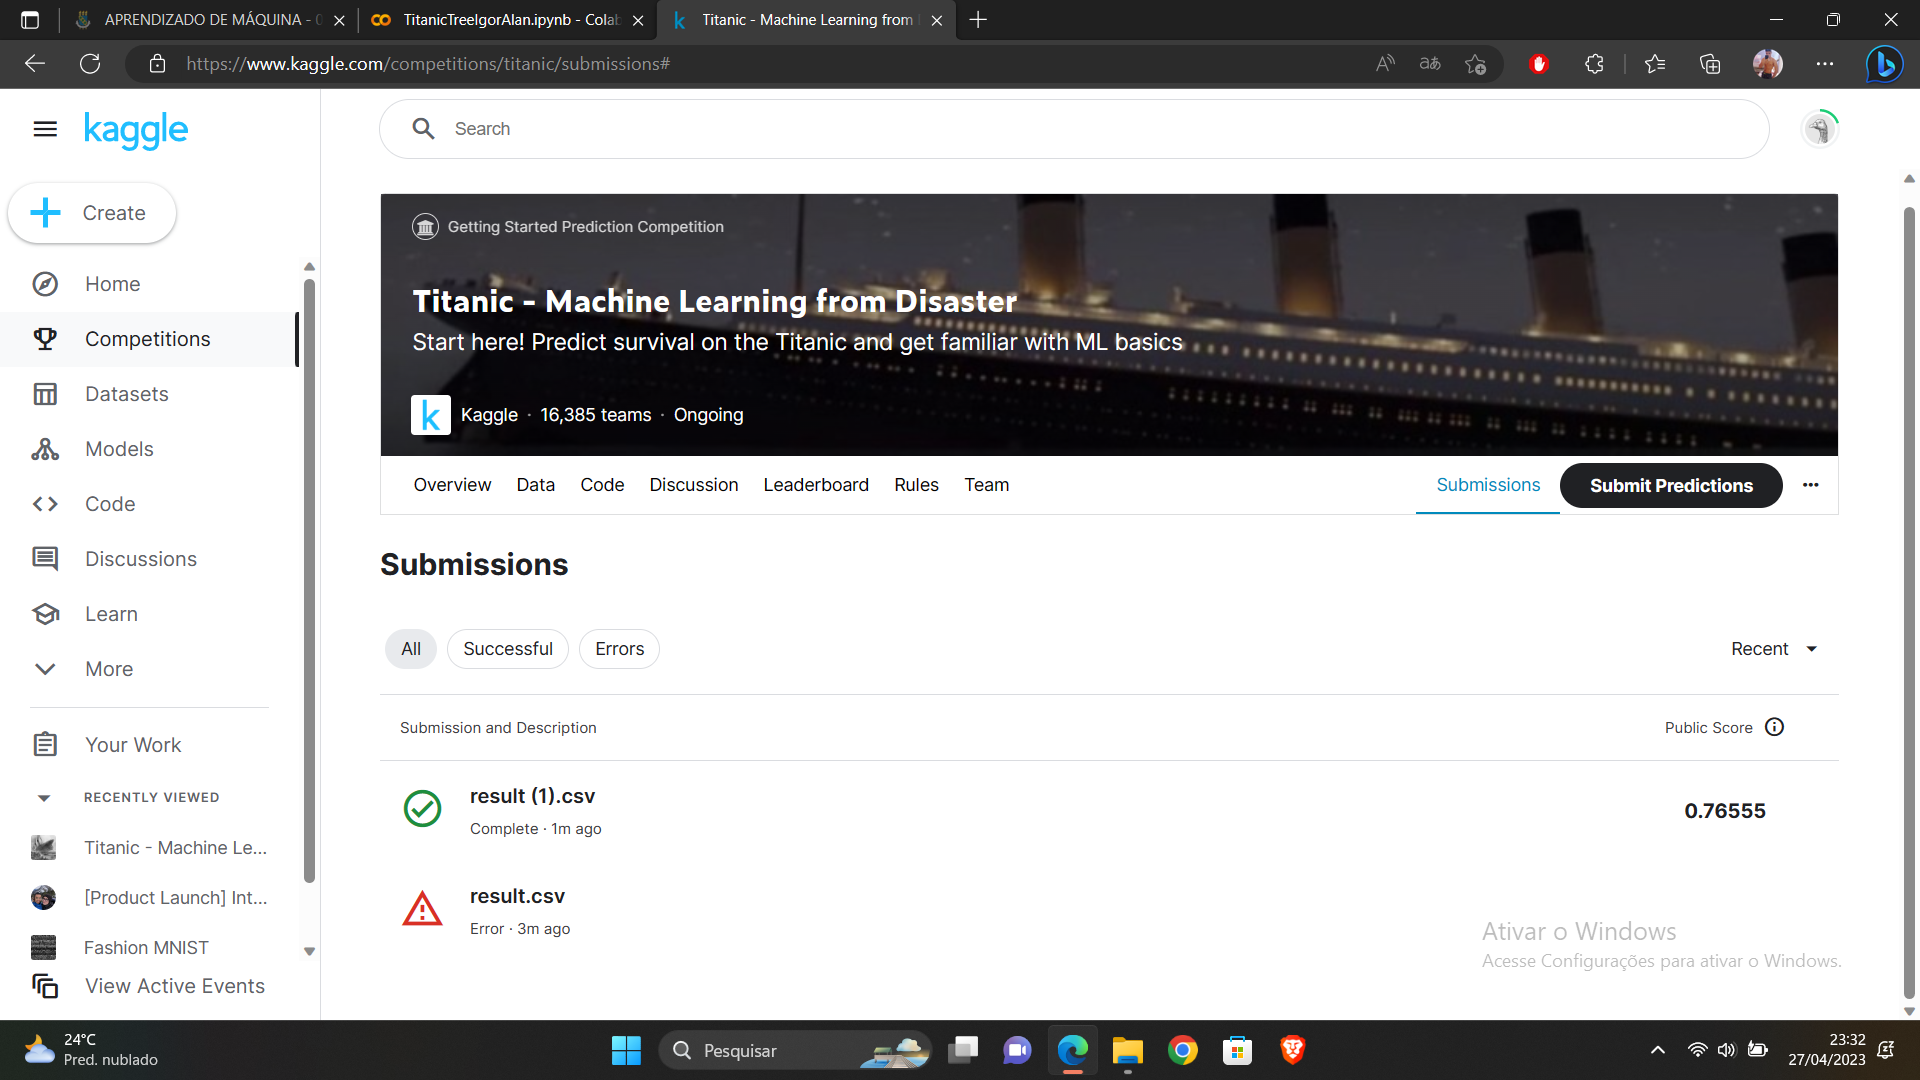